<a href="https://colab.research.google.com/github/Kayjayi/Kayjayi/blob/main/XG_Gas_Source_Analysis_05_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Gas Sources

In [ ]:
# Import the requred libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import the gas composition data
gas_data = pd.read_csv('Shale_coal_Dataset_Analysis_n.csv')
#X = gas_data.iloc[:,:-3].values
X = gas_data.iloc[:,:-1].values # for all the parameters

y = gas_data.iloc[:,-1].values
#print(X)



# Plot of the dataset


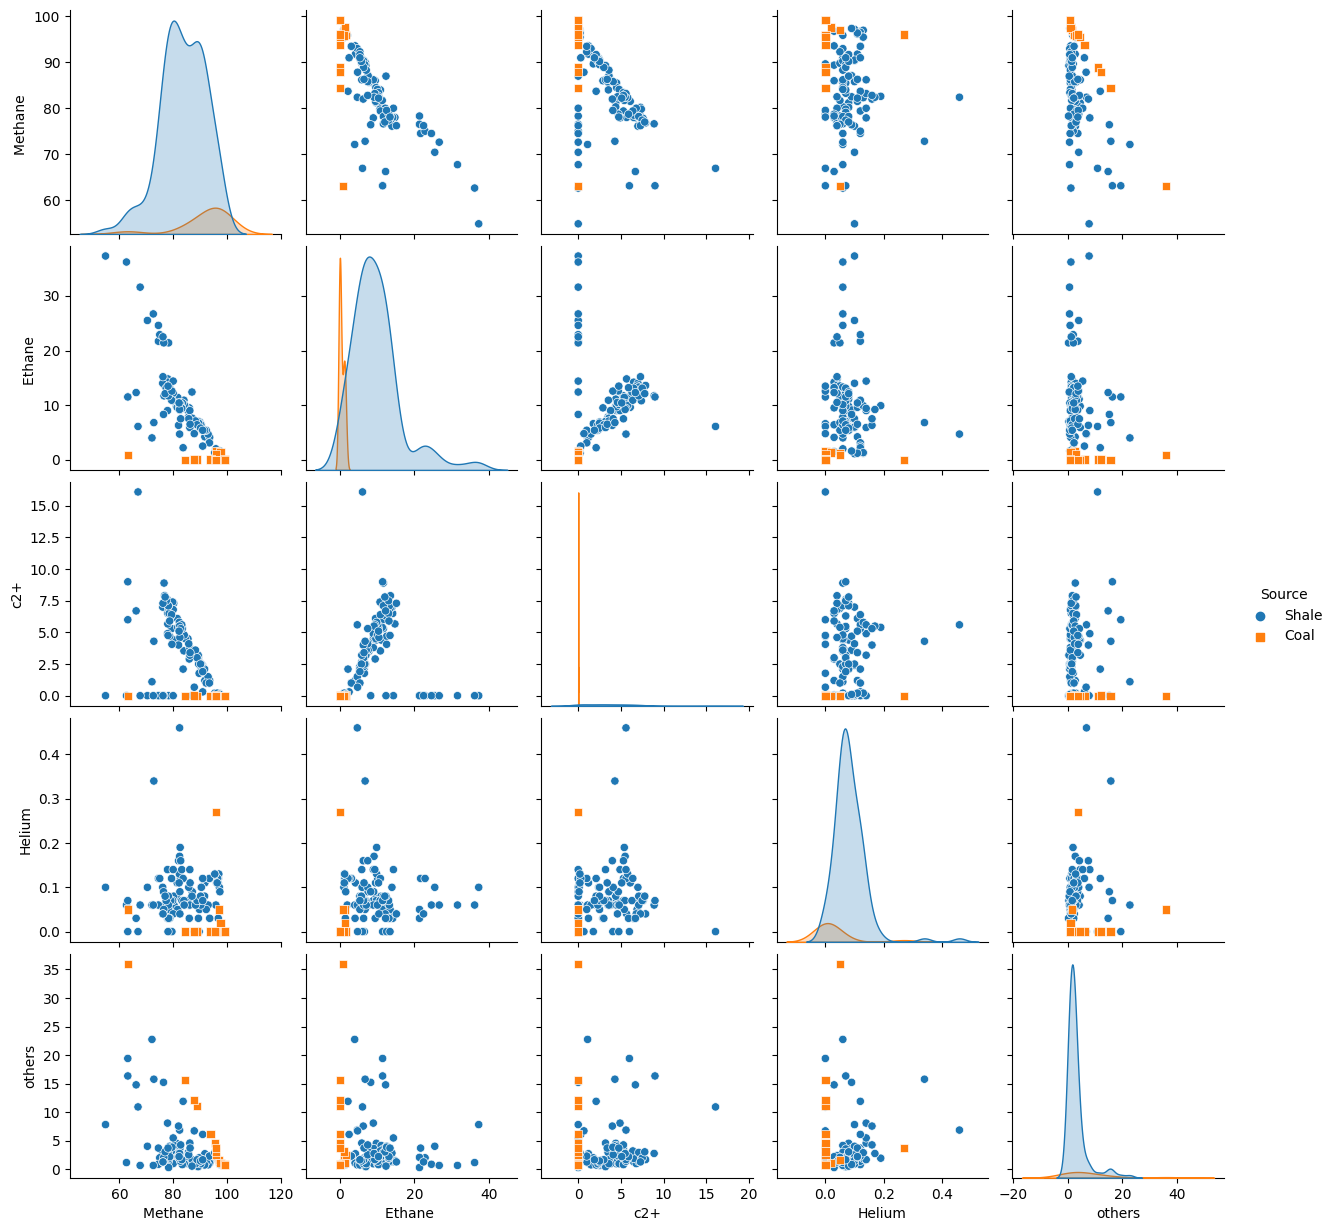

In [ ]:
import seaborn as sns
sns.pairplot(gas_data, hue ='Source', markers=["o", "s"])


Import Gas Composition Data

In [ ]:
# Presentation of data summary
print(gas_data)
gas_data.head()
#gas_data.describe()

     Methane   Ethane    c2+  Helium  others Source
0       90.40     6.50  2.10    0.06    0.94  Shale
1       85.70     7.80  3.50    0.06    2.94  Shale
2       85.50     9.00  4.50    0.07    0.93  Shale
3       77.90    13.70  6.70    0.03    1.67  Shale
4       78.90    12.40  7.20    0.07    1.43  Shale
..        ...      ...   ...     ...     ...    ...
129     95.47     0.00  0.00    0.00    4.53   Coal
130     99.17     0.02  0.00    0.00    0.81   Coal
131     87.84     0.05  0.01    0.00   12.10   Coal
132     99.22     0.01  0.00    0.00    0.77   Coal
133     96.05     0.01  0.00    0.27    3.67   Coal

[134 rows x 6 columns]


,Methane,Ethane,c2+,Helium,others,Source
0,90.4,6.5,2.1,0.06,0.94,Shale
1,85.7,7.8,3.5,0.06,2.94,Shale
2,85.5,9.0,4.5,0.07,0.93,Shale
3,77.9,13.7,6.7,0.03,1.67,Shale
4,78.9,12.4,7.2,0.07,1.43,Shale


# Label Encoding of Target variable

In [ ]:
from pandas._config import describe_option
from sklearn.preprocessing import LabelEncoder
labels=[0,1]
classes = ['coal', 'shale']
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state= 2 )
print(y_train)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


# Feature Scaling

In [ ]:
# # Scale the parameters
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test) # Note that only transform is used for X_test

## Feature Scaling, Model Training, and Prediction with Logistic Regression

In [ ]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))
#print(classifier.predict(sc.transform([[85.7,7.8,3.5]])))
#print(classifier.predict(sc.transform([[85.7]])))
#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  1]
 [ 0 31]]


0.9705882352941176

# K-Nearest Neigbors

In [ ]:
# Using K-Nearest Neigbor classification algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 1  2]
 [ 0 31]]


0.9411764705882353

# SVM

In [ ]:
# Using support vector 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))



[[ 2  1]
 [ 0 31]]


0.9705882352941176

# Kernel SVM

In [ ]:
# Using support vector method with RBF Kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
 
# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  1]
 [ 0 31]]


0.9705882352941176

# Naive Bayes

In [ ]:
# Using support vector method with RBF Kernel
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  0]
 [ 0 31]]


1.0

# Decision Tree Classifer

In [ ]:
# Using support vector method with RBF Kernel
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2  1]
 [ 0 31]]


0.9705882352941176

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predict results with sample data
#print(classifier.predict(sc.transform([[85.7,7.8,3.5,0.06,2.94]])))

#Predict with the test data
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Predict the model accuracy with confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3  0]
 [ 1 30]]


0.9705882352941176

## XGBOOST

In [ ]:
from xgboost import XGBClassifier
# FOR REGRESSION, USE XGBRegressor
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

classifier = XGBClassifier(objective="multi:softmax",
                               num_class=2,
                               n_estimators=150)
#classifier.fit(X_train, y_train)
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_test, y_test)],
               eval_metric=['mlogloss'],
               early_stopping_rounds=10)

[0]	validation_0-mlogloss:0.45232	validation_1-mlogloss:0.47704
[1]	validation_0-mlogloss:0.31680	validation_1-mlogloss:0.36247
[2]	validation_0-mlogloss:0.22584	validation_1-mlogloss:0.28482
[3]	validation_0-mlogloss:0.16462	validation_1-mlogloss:0.23456
[4]	validation_0-mlogloss:0.12200	validation_1-mlogloss:0.20152
[5]	validation_0-mlogloss:0.09169	validation_1-mlogloss:0.17990
[6]	validation_0-mlogloss:0.07045	validation_1-mlogloss:0.16726
[7]	validation_0-mlogloss:0.05497	validation_1-mlogloss:0.15991
[8]	validation_0-mlogloss:0.04404	validation_1-mlogloss:0.15841
[9]	validation_0-mlogloss:0.03558	validation_1-mlogloss:0.14212
[10]	validation_0-mlogloss:0.02968	validation_1-mlogloss:0.14584
[11]	validation_0-mlogloss:0.02503	validation_1-mlogloss:0.13579
[12]	validation_0-mlogloss:0.02149	validation_1-mlogloss:0.14059
[13]	validation_0-mlogloss:0.01862	validation_1-mlogloss:0.13291
[14]	validation_0-mlogloss:0.01639	validation_1-mlogloss:0.13796
[15]	validation_0-mlogloss:0.01454	

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_class=2,
              num_parallel_tree=None, objective='multi:softmax', ...)

# Results and Accuracy prediction

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 2  1]
 [ 0 31]]


# Predict Gas Source

In [ ]:
#print(classifier.predict(sc.transform([[90,2,3,1,1]])))
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report([y_train], [y_test]))
#le.inverse_transform(result)
result = classifier.predict([[94,0.04,0,0,6.11]])

le.inverse_transform(result)

array(['Coal'], dtype=object)

# More Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(
    y_test,
    y_pred, labels=labels,
    target_names=classes))  

              precision    recall  f1-score   support

        coal       1.00      0.67      0.80         3
       shale       0.97      1.00      0.98        31

    accuracy                           0.97        34
   macro avg       0.98      0.83      0.89        34
weighted avg       0.97      0.97      0.97        34



In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb


xgb.plot_importance(regressor)
plt.show()